In [142]:
import fbprophet as fb
import pandas as pd
import numpy as np

In [143]:
data = pd.read_csv('/home/ganesh/Downloads/allYearHarangi.csv')
data

,Dates,Present Storage(TMC),Reservoir Level(TMC),Inflow,Outflow,MADIKERI,SOMWARPET,VIRAJPET
0,2011-01-01,3.74,2835.90,142.0,0.0,0.0,0.0,0.0
1,2011-01-02,3.76,2836.09,239.0,0.0,0.0,0.0,0.0
2,2011-01-03,3.77,2836.22,166.0,0.0,0.0,0.0,0.0
3,2011-01-04,3.78,2836.31,118.0,0.0,0.0,0.0,0.0
4,2011-01-05,3.79,2836.41,130.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2917,2018-12-27,1.59,2806.15,103.0,15.0,0.0,0.0,0.0
2918,2018-12-28,1.60,2806.33,98.0,15.0,0.0,0.0,0.0
2919,2018-12-29,1.61,2806.54,102.0,15.0,0.0,0.0,0.0
2920,2018-12-30,1.62,2806.72,99.0,15.0,0.0,0.0,0.0


In [144]:
y_axis = data.Inflow

In [145]:
x_axis = data.MADIKERI

In [146]:
data1 = data.drop(columns = ['Present Storage(TMC)','Reservoir Level(TMC)','Outflow','SOMWARPET','VIRAJPET'])

In [147]:
data1

,Dates,Inflow,MADIKERI
0,2011-01-01,142.0,0.0
1,2011-01-02,239.0,0.0
2,2011-01-03,166.0,0.0
3,2011-01-04,118.0,0.0
4,2011-01-05,130.0,0.0
...,...,...,...
2917,2018-12-27,103.0,0.0
2918,2018-12-28,98.0,0.0
2919,2018-12-29,102.0,0.0
2920,2018-12-30,99.0,0.0


In [148]:
df = pd.DataFrame(data1)
df.drop(columns = ['Inflow','MADIKERI'],inplace = True)
df

,Dates
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
2917,2018-12-27
2918,2018-12-28
2919,2018-12-29
2920,2018-12-30


In [149]:
# mix = np.mat(data1.loc[:,['Inflow','MADIKERI']])
# mix[0]
# a = list()
# for i in range(len(mix)):
#     a.append(list(np.array(mix[i])))
# a = np.array(a)
# print(a.shape)
# a.reshape(2922,2)

In [150]:
df = df.rename(columns = {'Dates':'ds'})
df['y'] = range(0,2922) 
df

,ds,y
0,2011-01-01,0
1,2011-01-02,1
2,2011-01-03,2
3,2011-01-04,3
4,2011-01-05,4
...,...,...
2917,2018-12-27,2917
2918,2018-12-28,2918
2919,2018-12-29,2919
2920,2018-12-30,2920


In [151]:
df['Inflow'] = data1.Inflow

In [152]:
df['MADIKERI'] = data.MADIKERI
df

,ds,y,Inflow,MADIKERI
0,2011-01-01,0,142.0,0.0
1,2011-01-02,1,239.0,0.0
2,2011-01-03,2,166.0,0.0
3,2011-01-04,3,118.0,0.0
4,2011-01-05,4,130.0,0.0
...,...,...,...,...
2917,2018-12-27,2917,103.0,0.0
2918,2018-12-28,2918,98.0,0.0
2919,2018-12-29,2919,102.0,0.0
2920,2018-12-30,2920,99.0,0.0


In [153]:
m = fb.Prophet(yearly_seasonality = True)
m.add_regressor('Inflow')
m.add_regressor('MADIKERI')

df_train = df.loc[df["ds"]<"2017-12-31"]
df_test  = df.loc[df["ds"]>="2018-01-01"]

In [154]:
m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [155]:
forecast = m.predict(df_test.drop(columns="y"))

In [157]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Inflow,Inflow_lower,Inflow_upper,MADIKERI,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,2557.000315,2556.994889,2557.004101,2557.000315,2557.000315,0.000026,0.000026,0.000026,-0.000058,...,6.625285e-07,6.625285e-07,6.625285e-07,-0.000598,-0.000598,-0.000598,0.0,0.0,0.0,2556.999686
1,2018-01-02,2558.000316,2557.995278,2558.004317,2558.000316,2558.000316,0.000027,0.000027,0.000027,-0.000058,...,-6.690657e-07,-6.690657e-07,-6.690657e-07,-0.000641,-0.000641,-0.000641,0.0,0.0,0.0,2557.999643
2,2018-01-03,2559.000318,2558.995314,2559.004192,2559.000318,2559.000318,0.000027,0.000027,0.000027,-0.000058,...,2.788035e-06,2.788035e-06,2.788035e-06,-0.000682,-0.000682,-0.000682,0.0,0.0,0.0,2558.999607
3,2018-01-04,2560.000319,2559.995127,2560.004019,2560.000319,2560.000319,0.000027,0.000027,0.000027,-0.000058,...,5.157226e-06,5.157226e-06,5.157226e-06,-0.000720,-0.000720,-0.000720,0.0,0.0,0.0,2559.999573
4,2018-01-05,2561.000321,2560.994787,2561.003915,2561.000321,2561.000321,0.000027,0.000027,0.000027,-0.000058,...,3.942742e-06,3.942742e-06,3.942742e-06,-0.000756,-0.000756,-0.000756,0.0,0.0,0.0,2560.999537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,2917.000837,2916.994690,2917.007107,2916.996690,2917.005324,0.000028,0.000028,0.000028,-0.000058,...,5.157226e-06,5.157226e-06,5.157226e-06,-0.000367,-0.000367,-0.000367,0.0,0.0,0.0,2917.000444
361,2018-12-28,2918.000838,2917.994188,2918.006845,2917.996673,2918.005354,0.000028,0.000028,0.000028,-0.000058,...,3.942742e-06,3.942742e-06,3.942742e-06,-0.000411,-0.000411,-0.000411,0.0,0.0,0.0,2918.000401
362,2018-12-29,2919.000840,2918.993779,2919.006727,2918.996656,2919.005383,0.000028,0.000028,0.000028,-0.000058,...,-6.798557e-06,-6.798557e-06,-6.798557e-06,-0.000455,-0.000455,-0.000455,0.0,0.0,0.0,2919.000348
363,2018-12-30,2920.000841,2919.994535,2920.006828,2919.996639,2920.005424,0.000028,0.000028,0.000028,-0.000058,...,-5.082909e-06,-5.082909e-06,-5.082909e-06,-0.000499,-0.000499,-0.000499,0.0,0.0,0.0,2920.000307


In [159]:
forecast.to_csv(r"/home/ganesh/Downloads/exp_pred.csv")

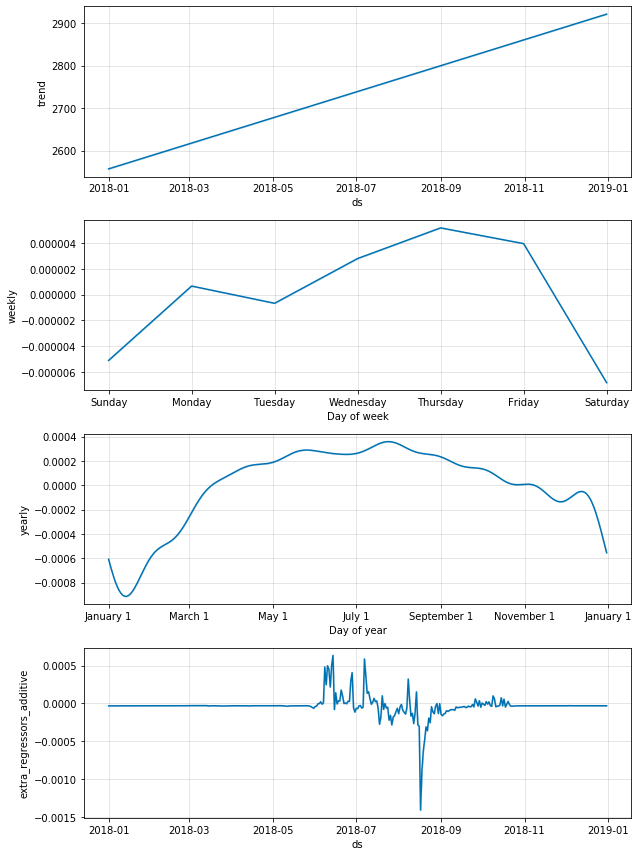

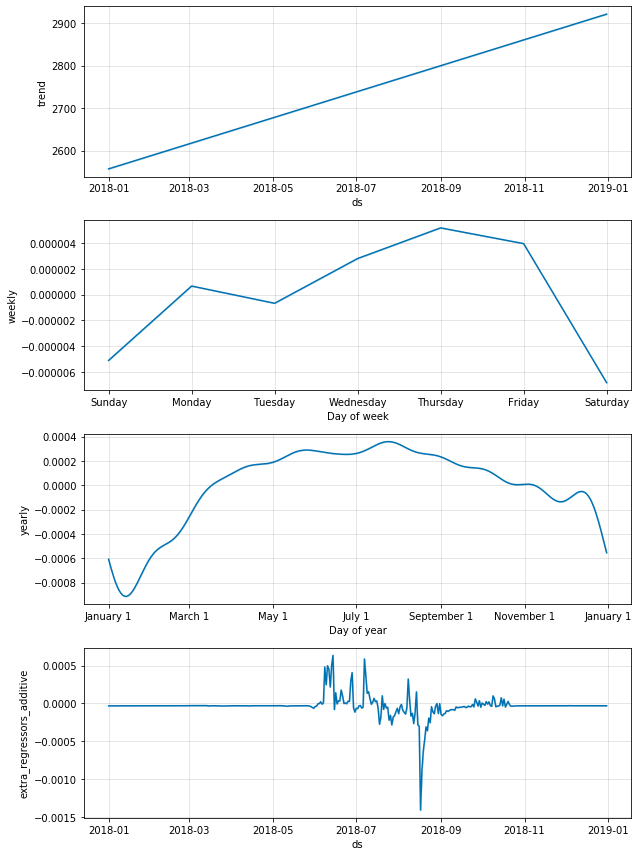

In [160]:
m.plot_components(forecast)